In [2]:
!pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests as rq
import json
import numpy as np
import pickle
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from time import sleep
from bs4 import BeautifulSoup

In [2]:
total = 0
api_key = '7WbEbXuv03iEqV787tweGzUqZXXgtHDg'
scratched_data = []

In [3]:
for year in tqdm(range(2021, 2023)):
    for month in tqdm(range(1, 13)):
        req = rq.get(f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={api_key}")
        sleep(12)
        scratched_data += req.json()["response"]["docs"]

100%|██████████| 2/2 [09:03<00:00, 271.65s/it]


In [ ]:
print(len(scratched_data))
scratched = pd.DataFrame(scratched_data)
print(scratched)
scratched.to_pickle('./nytimes-dataset/nytimes.pkl')
scratched.to_csv('./nytimes-dataset/nytimes.csv')

In [20]:
train_data = []
for i, row in tqdm(scratched.iterrows()):
    if random.uniform(0,100) < 3:
        train_data.append(row)
train = pd.DataFrame(train_data)
print(len(train))
train = train.reset_index().drop(columns=['index'])
train.to_pickle('./nytimes-dataset/train.pkl')

103236it [00:07, 14087.83it/s]


3101


In [4]:
train = pd.read_pickle('./nytimes-dataset/train_v2.pkl')
sum = 0
for i in train['n_comment']:
    if i > 0:
        sum += 1
print(sum / len(train), sum)
print(train['n_comment'].max())
print(train[train['pub_month'].duplicated()]['pub_month'].value_counts())


0.2917150209395025 11563
4395
1     4104
3     3396
9     3377
11    3339
6     3335
4     3279
7     3268
2     3211
8     3185
5     3160
10    3101
12    2871
Name: pub_month, dtype: int64


In [170]:
pd.to_datetime(train['pub_date'])[0].day()

TypeError: 'int' object is not callable

In [149]:
comment_example = pd.read_pickle('D:/111-2/Into_Artificial_Intelligence/project/NYT-Article-Popularity/comments/2020-01-comments.pickle')
article_example = pd.read_pickle('D:/111-2/Into_Artificial_Intelligence/project/NYT-Article-Popularity/articles/2020-01-articles.pickle')
comment_example.loc[comment_example['articleID'] == 'nyt://article/2e1776c4-fc7b-516e-be5d-593365e74776']


,status,commentSequence,userID,userDisplayName,userLocation,userTitle,userURL,picURL,commentTitle,commentBody,...,editorsSelection,parentID,parentUserDisplayName,depth,commentType,trusted,recommendedFlag,permID,isAnonymous,articleID
commentID,,,,,,,,,,,,,,,,,,,,,
104912202,approved,104912202,101660052,Trevor Daigel,"Glenbard West HS, Glen Ellyn IL",NULL,NULL,None,<br\//>,Hieroglyphs and emojis do share a lot in commo...,...,False,<NA>,None,1,comment,0,0,104912202,False,nyt://article/2e1776c4-fc7b-516e-be5d-593365e7...


In [ ]:
for i in scratched['pub_date']:
    print(type(i))

In [44]:
train_test = pd.read_pickle('C:/Users/88690/Desktop/人工/NYCU-Intro-AI-Final-Project/final-project/nytimes-dataset/train_v2.pkl')
train_test = train_test.drop(train_test[train_test['n_comment'] <= 0].index)
print(train_test['n_comment'].median())
print(len(train_test) * 0.75)
train_test['is_popular'] = train_test['n_comment'].apply(lambda x : 1 if x > 57 else 0)
train_test['is_popular'].value_counts(normalize=True)
#train_test[train_test['n_comments'].duplicated()]['n_comments'].value_counts()

57.0
8672.25


0    0.503848
1    0.496152
Name: is_popular, dtype: float64

Text(0.5, 1.0, 'Number of Comments')

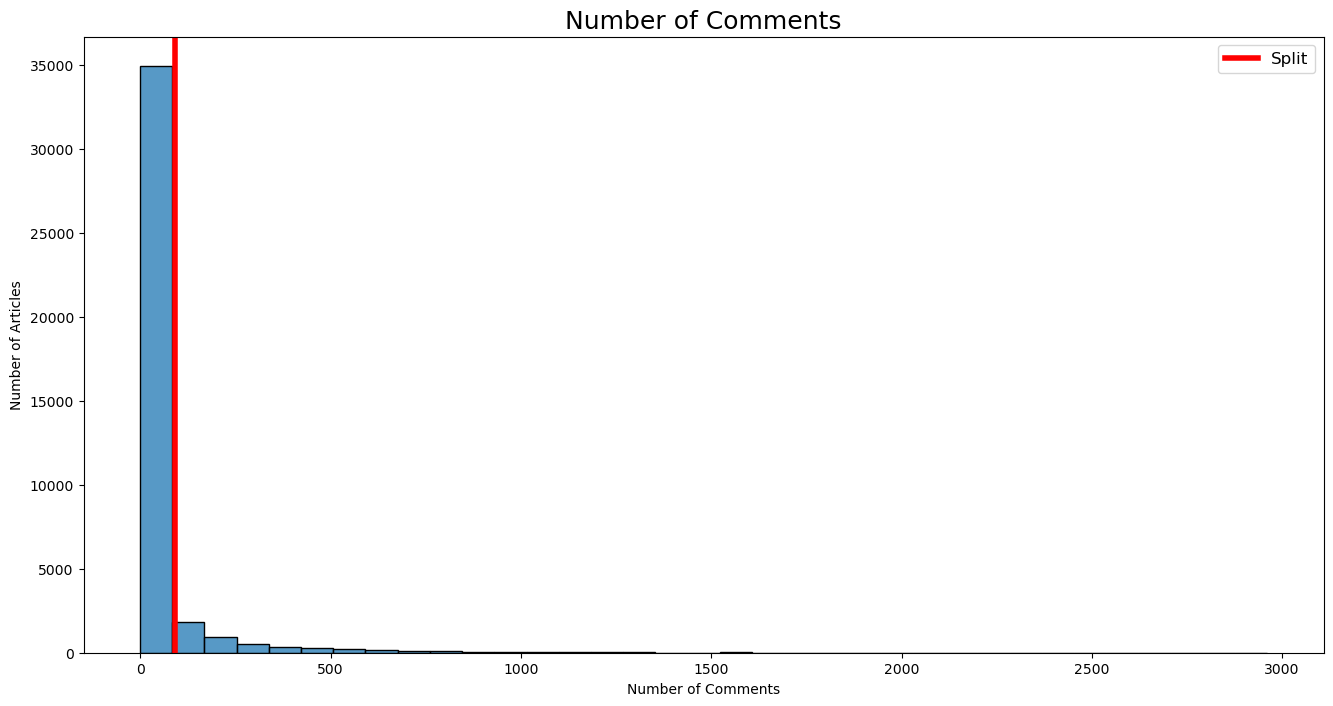

In [8]:
train = pd.read_pickle('./nytimes-dataset/train_v2.pkl') 

In [10]:
train = pd.read_pickle('C:/Users/88690/Desktop/人工/NYCU-Intro-AI-Final-Project/final-project/nytimes-dataset/train_v2.pkl' )
train = train.drop(train[train['n_comment'] <= 0].index)
train['is_popular'] = train['n_comment'].apply(lambda x : 1 if x > 57 else 0)
train['is_weekend'] = train['pub_weekday'].apply(lambda x : 1 if (x == 5 or x == 6) else 0)
train['is_primehour'] = train['pub_time'].apply(lambda x : 1 if (x > 5 and x < 11) else 0)
train['is_taiwan'] = train['keywords'].apply(lambda x: 1 if 'Taiwan' in x else 0)
train['is_party'] = train['keywords'].apply(lambda x: 1 if 'Democratic Party' in x or 'Senate' in x else 0)
train['is_國會'] = train['keywords'].apply(lambda x: 1 if 'House of Representatives' in x or 'Republican Party' in x else 0)
train['is_Trump'] = train['keywords'].apply(lambda x: 1 if 'Trump, Donald J' in x else 0)
train['is_biden'] = train['keywords'].apply(lambda x: 1 if 'Biden, Joseph R Jr' in x else 0)
train['is_storm'] = train['keywords'].apply(lambda x: 1 if 'Storming of the US Capitol (Jan, 2021)' in x else 0)
train['is_UR'] = train['keywords'].apply(lambda x : 1 if 'War and Armed Conflicts' in x or 'Ukraine' in x  else 0)
train['is_idiot'] = train['keywords'].apply(lambda x: 1 if 'Spelling Bee (Game)'  in x or 'Crossword Puzzles' in x else 0)
train['is_NY'] = train['keywords'].apply(lambda x : 1 if 'Coronavirus (2019-nCoV)' in x  else 0)
train['is_new'] = train['keywords'].apply(lambda x : 1 if 'AFGHANISTAN' in x  else 0)
train['n_keywords'] = train['keywords'].apply(lambda x : len(x))
print(train.corr()['is_popular'])
k = train['keywords']
'''
l = []
tt = []
for i in tqdm(train['keywords'][0:100]):
    for s in i:
        if s not in l:
            l.append(s)
            train[f'is_{s}'] = train['keywords'].apply(lambda x : 1 if s in x else 0)
            if train.corr()['is_popular'][f'is_{s}'] > 0.07:
                tt.append(s)
            train = train.drop(columns=f'is_{s}')
'''
# United States Politics and Government, internal-essential, New York City, Biden, Joseph R Jr, Republican Party, Television, Trump, Donald J, 
# Crossword Puzzles 0.1

word_count      0.154376
pub_year        0.033670
pub_month       0.020163
pub_day        -0.006693
pub_weekday     0.035212
pub_time       -0.032047
abstract_len   -0.125093
abstract_dup    0.090821
headline_len   -0.011118
headline_dup    0.091377
len_lead        0.063279
n_comment       0.525138
is_popular      1.000000
is_weekend      0.083453
is_primehour    0.053867
is_taiwan       0.017394
is_party        0.141512
is_國會           0.194004
is_Trump        0.177918
is_biden        0.162837
is_storm        0.123614
is_UR           0.051478
is_idiot        0.145126
is_NY           0.043477
is_new          0.017324
n_keywords      0.083847
Name: is_popular, dtype: float64


"\nl = []\ntt = []\nfor i in tqdm(train['keywords'][0:100]):\n    for s in i:\n        if s not in l:\n            l.append(s)\n            train[f'is_{s}'] = train['keywords'].apply(lambda x : 1 if s in x else 0)\n            if train.corr()['is_popular'][f'is_{s}'] > 0.07:\n                tt.append(s)\n            train = train.drop(columns=f'is_{s}')\n"

Text(0.5, 1.0, 'Avg Popularity vs Frequency (Day of Week)')

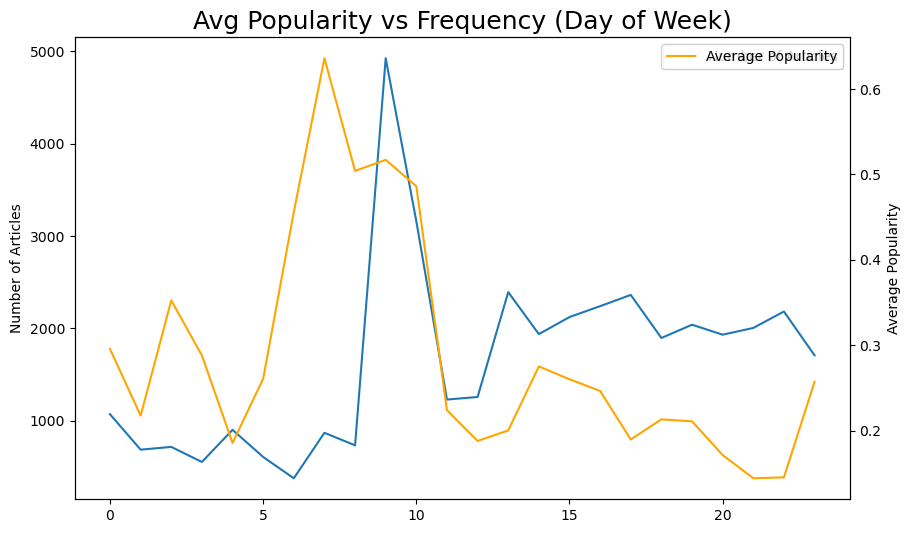

In [17]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=train['pub_time'].value_counts(), label='Number of Articles')
ax.set_ylabel('Number of Articles')
ax.legend(loc=0)
ax2 = ax.twinx()
sns.lineplot(data=train.groupby('pub_time').mean()['is_popular'], color='orange', ax=ax2, label='Average Popularity')
ax2.set_ylabel('Average Popularity')
ax2.legend(loc=1)
plt.title('Avg Popularity vs Frequency (Day of Week)', fontsize=18)

In [ ]:
dup = train[train['abstract'].duplicated()]['abstract'].value_counts()
for i in train['abstract']:
    try:
        print(f'{i} : {dup.iloc[i]}')
    except:
        print(f'{i} : 0')

In [9]:
urls = train['web_url']
train['n_comment'] = [0 for _ in range(len(train))]

In [ ]:
train

In [10]:
for i in tqdm(range(len(urls))):
    response = rq.get(
                url='https://www.nytimes.com/svc/community/V3/requestHandler',
                params={
                    'cmd': 'GetCommentsAll',
                    'url': urls[i],
                    'limit': 1000,
                    'sort': 'oldest'
                },
            )
    if response.status_code == '200':
        try:
            n_comment = len(response.json()['results']['comments'])
        except:
            n_comment = 0
        train['n_comment'][i] = n_comment


100%|██████████| 1032/1032 [14:55<00:00,  1.15it/s]
